Estimated number of clusters: 2
Silhouette Score: 0.40
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster  True Label  
0        0           0  
1        0           0  
2        0           0  
3        0           0  
4        0           0  


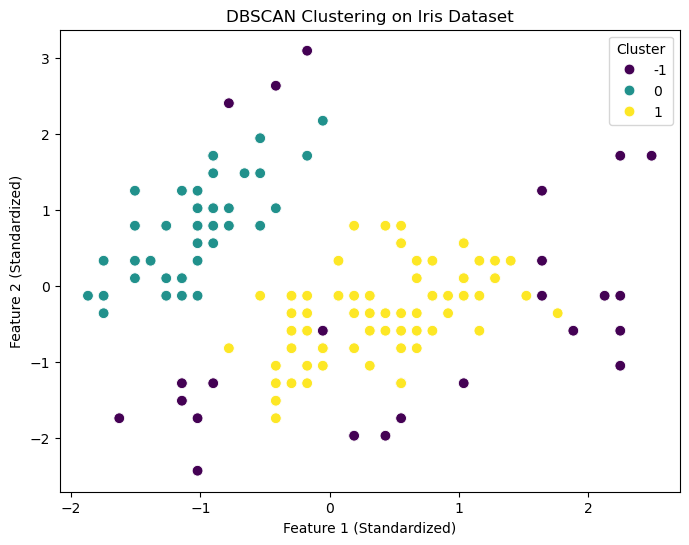

Number of noise points: 26


In [1]:
# DBSCAN Clustering Demonstration using Iris Dataset

# Import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Load the dataset
iris = load_iris()
X = iris.data
y_true = iris.target
features = iris.feature_names

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN clustering 
# eps = neighborhood radius; min_samples = minimum points required to form a dense region
dbscan = DBSCAN(eps=0.6, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Analyze the results
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print(f"Estimated number of clusters: {n_clusters}")

# Calculate silhouette score (only if more than 1 cluster)
if n_clusters > 1:
    sil_score = silhouette_score(X_scaled, clusters)
    print(f"Silhouette Score: {sil_score:.2f}")
else:
    print("Silhouette Score not applicable (only one cluster found).")

# Add cluster labels to a DataFrame for inspection
df = pd.DataFrame(X, columns=features)
df["Cluster"] = clusters
df["True Label"] = y_true
print(df.head())

# Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_scaled[:,0], y=X_scaled[:,1],
    hue=clusters, palette="viridis", s=60
)
plt.title("DBSCAN Clustering on Iris Dataset")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.legend(title="Cluster", loc="best")
plt.show()

# Visualize noise points 
noise_points = np.sum(clusters == -1)
print(f"Number of noise points: {noise_points}")


KNN (k=5) Accuracy: 0.93

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



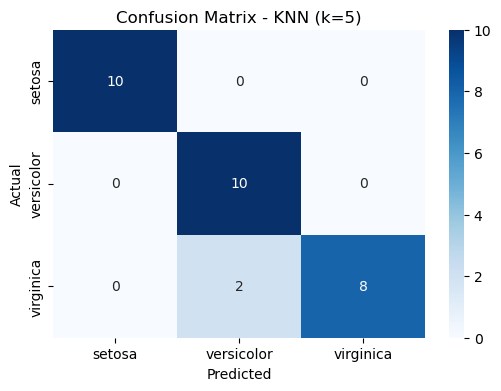

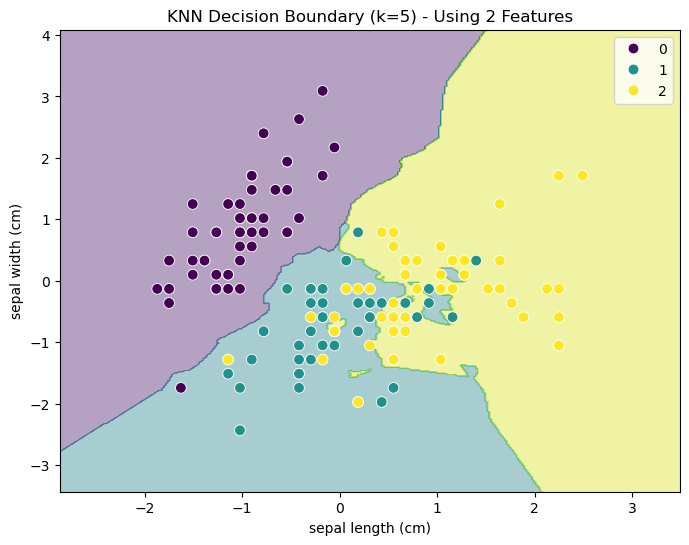

In [3]:
# K-Nearest Neighbors (KNN) Classification Demonstration using Iris Dataset

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset 
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Train the KNN model 
k = 5  # You can change this value to test different neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Step 6: Make predictions 
y_pred = knn.predict(X_test)

# Evaluate performance 
acc = accuracy_score(y_test, y_pred)
print(f"KNN (k={k}) Accuracy: {acc:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix Visualization 
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=target_names, yticklabels=target_names)
plt.title(f"Confusion Matrix - KNN (k={k})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Visualize decision boundaries (optional for 2 features)
# We'll use only two features for a 2D plot
X_2d = X_scaled[:, :2]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2d, y, test_size=0.2, random_state=42, stratify=y)

knn2 = KNeighborsClassifier(n_neighbors=k)
knn2.fit(X_train2, y_train2)

# Create a mesh grid for plotting
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = knn2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap="viridis")
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=iris.target, palette="viridis", s=60)
plt.title(f"KNN Decision Boundary (k={k}) - Using 2 Features")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.show()


Dataset shape: (1797, 64)
Number of unique labels: 10

Cluster Centers Shape: (10, 64)
Silhouette Score: 0.14


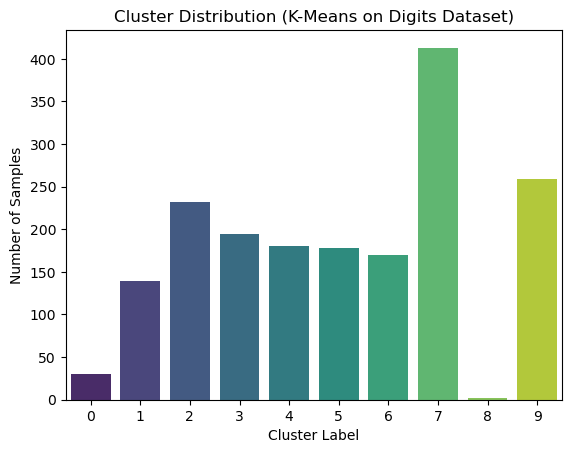

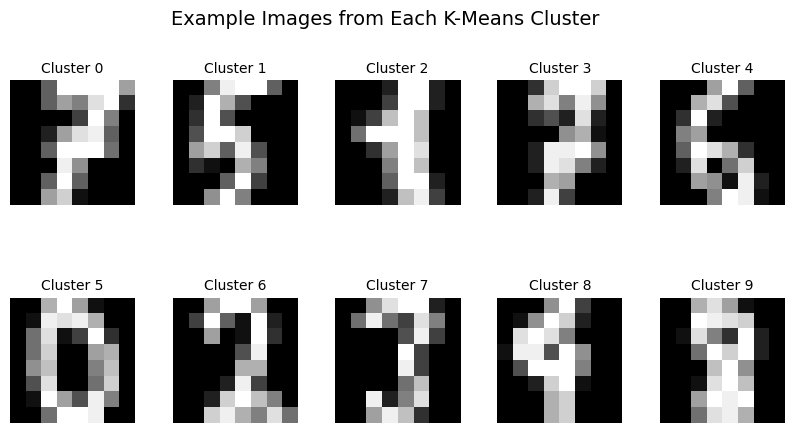

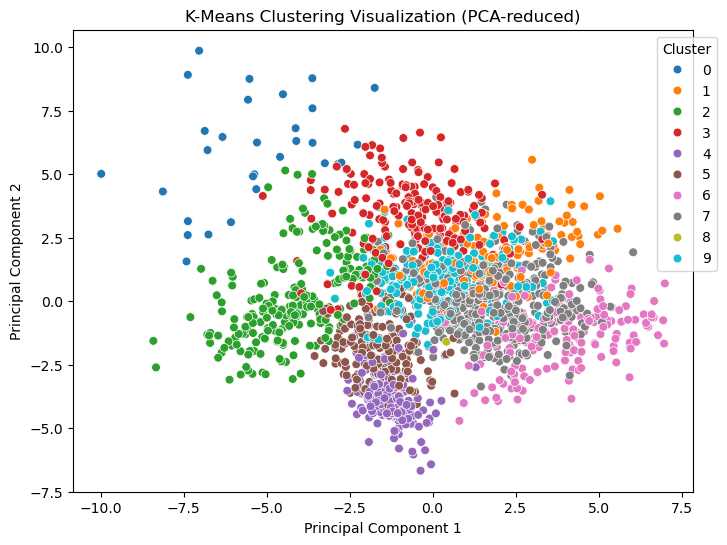

In [7]:
# K-Means Clustering Demonstration on Handwritten Digits Dataset

# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the Handwritten Digits Dataset
digits = load_digits()
X = digits.data
y = digits.target

print("Dataset shape:", X.shape)
print("Number of unique labels:", len(np.unique(y)))

# Step 3: Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means Clustering
n_clusters = 10  # Digits 0–9
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Evaluate Clustering Performance
print("\nCluster Centers Shape:", kmeans.cluster_centers_.shape)

# Silhouette Score (measures how well clusters are separated)
sil_score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {sil_score:.2f}")

# Visualize Cluster Distribution
sns.countplot(x=clusters, palette="viridis")
plt.title("Cluster Distribution (K-Means on Digits Dataset)")
plt.xlabel("Cluster Label")
plt.ylabel("Number of Samples")
plt.show()

# Visualize Sample Digits from Each Cluster
plt.figure(figsize=(10, 5))  # slightly shorter height
for i in range(n_clusters):
    cluster_idx = np.where(clusters == i)[0]
    random_idx = np.random.choice(cluster_idx)
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[random_idx], cmap='gray')
    plt.title(f"Cluster {i}", fontsize=10)
    plt.axis('off')

# Adjust layout to reduce vertical gaps
plt.subplots_adjust(wspace=0.3, hspace=0.3)  # reduce hspace
plt.suptitle("Example Images from Each K-Means Cluster", fontsize=14)
plt.show()


# Visualize in 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette="tab10", s=40)
plt.title("K-Means Clustering Visualization (PCA-reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster", loc="best", bbox_to_anchor=(1.05, 1))
plt.show()
